# Create the right plots for my thesis

Note this uses monty to load the plots but saves them manually (overwriting previous plots)

In [22]:
%matplotlib inline

from monty import Monty, Monty11
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def autodb(res):
    """Change a.u. to dB power. Used in the data result."""
    return 10*np.log10(np.abs(res)**2/50*1000)

def autodeg(res):
    """Change a.u. result to phase angle in degrees."""
    return np.unwrap(np.angle(res))  # FIXME: Add axis=

## Plotting functions

So I can change all the plot themes at once

In [27]:
def save_plot(fname):
    path = os.path.join('figures', fname + '.png')
    print(f"Saved to {path}")
    plt.savefig(path)

def plot_amp_phase(X, amp, phase, name="amp_phase", xlabel="P1 voltage", fname="fname"):
    """Plot both amplitude and phase of a result."""
    fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True)

    ax0.plot(X, amp, ".-", color="steelblue")
    ax1.plot(X, phase, ".-", color="orange")
    
    ax0.set_ylabel("Amplitude")
    ax1.set_ylabel("Phase")
    ax0.set_title(monty.plot_title + "." + name)
    ax1.set_xlabel(xlabel)
    
    ax0.grid()
    ax1.grid()
    fig.align_ylabels([ax0, ax1])
    plt.tight_layout()
    
    save_plot(fname)
    
    
    
def oned_plot(X, Y, title="title", xlabel="x label", ylabel="y label", fname="fname"):
    """Plot a simple 1D plot"""
    fig, ax = plt.subplots()
    ax.plot(X, Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid()
    plt.tight_layout()
    save_plot(fname)
    
    



## Common names

In case I want to change them later

In [36]:
ST = "SET Plunger"
DETUNING = "Detuning (P1-P2)"


SLB = "Left barrier"
SRB = "Right barrier"

## Coulomb sweeps

In [29]:
# Load the data
monty = Monty("summary.dc_detuning")
result = monty.loadrun("SET_ST_sweep.1")

print(result.keys())
monty.parameters

[2024-09-11 13:14:03,780] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:03,780] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:03,780] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:03,780] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:03,780] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:03,780] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:03,891] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:03,891] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:03,891] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:03,891] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:03,891] WARNING Note that no experimental data has been loaded.
[2

{'datafiles': ['SET_ST_sweep.1.xz'],
 'figures': ['SET_ST_sweep.1_1D.png'],
 'parameters': {'SLB': 'Fixed at 0.899997V',
  'SRB': 'Fixed at 0.900001V',
  'ST': 'range from 3.3v -> 3.7v, over 201 pts',
  'desc': 'Quick 1D scan of the SET over ST'},
 'runid': 27,
 'time_end': '2024-09-10 17:11:33.928496',
 'time_start': '2024-09-10 17:10:08.995404'}

Saved to figures/coulombs.png


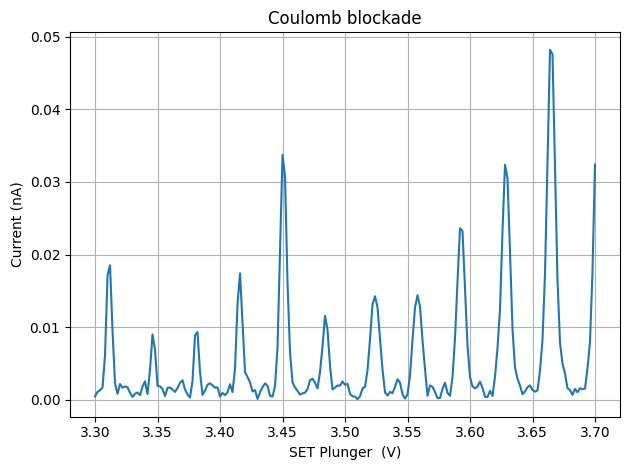

In [30]:
X = np.linspace(3.3, 3.7, 201)
Y = result["R"] * 1e9  # convert to nA
oned_plot(X, Y, xlabel=ST + "  (V)", ylabel="Current (nA)", title="Coulomb blockade", fname="coulombs")

In [31]:
# Load the data
monty = Monty("dc.power_recovery")
result = monty.loadrun("1D_SET_sweep.7")

print(result.keys())
monty.parameters

[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:11,324] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:14:12,609] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:12,609] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:12,609] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:14:12,609] WARNING Note that no experimental data has

{'datafiles': ['1D_SET_sweep.7.xz'],
 'figures': ['1D_SET_sweep.7_1D.png'],
 'parameters': {'SLB': 'Fixed at 0.949997V',
  'SRB': 'Fixed at 0.950002V',
  'ST': 'range from 3.2v -> 3.3v, over 101 pts',
  'desc': 'Quick 1D scan of the SET over ST'},
 'runid': 8,
 'time_end': '2024-06-26 11:48:47.618196',
 'time_start': '2024-06-26 11:47:53.351770'}

Saved to figures/3_peaks.png


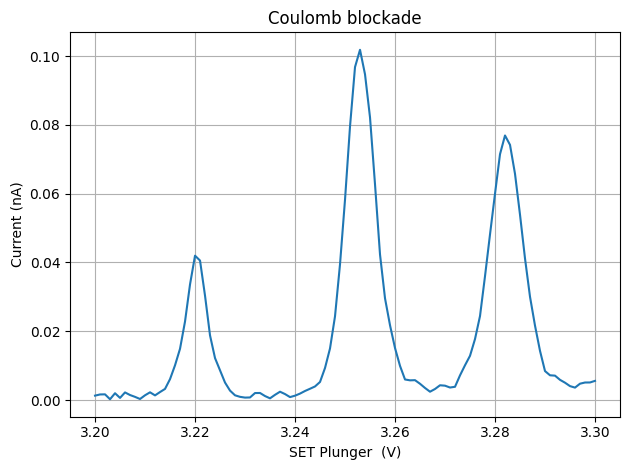

In [32]:
X = np.linspace(3.2, 3.3, 101)
Y = result["R"] * 1e9
oned_plot(X, Y, xlabel=ST + "  (V)", ylabel="Current (nA)", title="Coulomb blockade", fname="3_peaks")


## Count electrons

In [33]:
# Load the data
monty = Monty("dc.power_recovery")
result = monty.loadrun("detuning_scan.82")

print(result.keys())
monty.parameters

[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:14,608] INFO Loading existing experiment (ignoring given experiment parameters)
[2024-09-11 13:17:16,163] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:17:16,163] WARNING Note that no experimental data has been loaded.
[2024-09-11 13:17:16,163] WARNING Note that no exper

{'datafiles': ['detuning_scan.82.xz'],
 'figures': ['detuning_scan.82_detuning.png'],
 'parameters': {'J1': 'Fixed at 2.900002V',
  'P1': 'Ranged from 1.625V -> 2.1V in 1001 points',
  'P2': 'Ranged from 2.1V -> 1.625V in 1001 points',
  'SETB': 'Fixed at 0.0V',
  'SLB': 'Fixed at 0.930001V',
  'SRB': 'Fixed at 0.929996V',
  'ST': 'Fixed at 3.424616V (target of 4e-11 on lockin, stepsize = 0.0002)',
  'desc': 'Sweep detuning axis (P1 - P2) (feedback)',
  'lockin_amplitude': 'Set to 10uV',
  'temp': 'Mixing chamber 0.0153677 K'},
 'runid': 457,
 'time_end': '2024-07-02 14:37:08.583462',
 'time_start': '2024-07-02 14:17:21.770680'}

Saved to figures/4_electrons.png


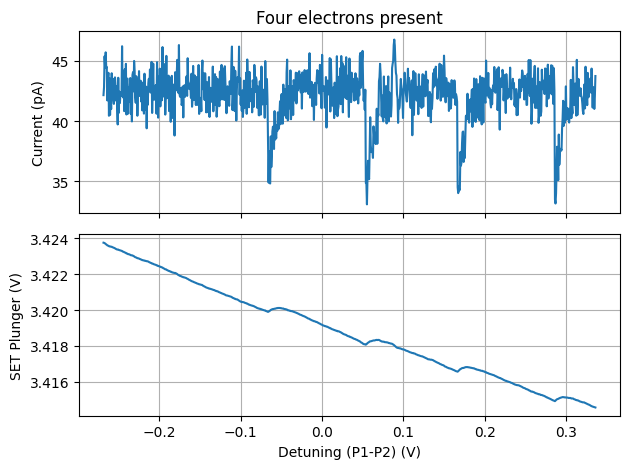

In [42]:
# X is detuning axis
X = np.linspace((1.625-2.1)/np.sqrt(2), (2.1-1.625)/np.sqrt(2), 1001)
Y1 = result["R"] * 1e12
Y2 = result["ST"]


cutoff = 100  # focus on the important region

X = X[cutoff:]
Y1 = Y1[cutoff:]
Y2 = Y2[cutoff:]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

ax0.plot(X, Y1)
ax0.set_ylabel("Current (pA)")
ax0.set_title("Four electrons present")
ax0.grid()

ax1.plot(X, Y2)
ax1.set_ylabel(ST + " (V)")
ax1.set_xlabel(DETUNING + " (V)")
ax1.grid()

 
plt.tight_layout()
save_plot("4_electrons")
    